## 1. Load The Data

### 1.1 Import libraries

In [1]:
from bs4 import BeautifulSoup 
import numpy as np
import requests

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### 2.2 Load dataset 

In [4]:
# load from website
ad='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
r=requests.get(ad)
soup=BeautifulSoup(r.text,"html.parser")
column=['sepal-length','sepal-width','petal-length','petal-width','class']
my_table = soup.text.split('\n')[:150]

# convert text to lists of string list
lists=[]
for i in my_table:
# delete extra white space
    k=" ".join(i.split())
    lists.append(k.split(','))  
df=pd.DataFrame(lists,columns=column)
# cast str to float (double quare bracelate of columns names) 
df[['sepal-length','sepal-width','petal-length','petal-width']] = df[['sepal-length','sepal-width','petal-length','petal-width']].applymap(np.float)
df.tail()

,sepal-length,sepal-width,petal-length,petal-width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# directly load from sk learn
from sklearn import datasets
iris = datasets.load_iris()
iris.data.shape, iris.target.shape

((150, 4), (150,))

In [6]:
iris.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 2. Summarize the Dataset

### 2.1 Statistical Summary

In [7]:
print(df.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 2.2 Class Distribution

In [8]:
print(df.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


## 3 Data Visualization

### 3.1 Univariate Plots 

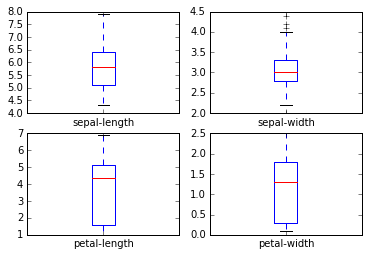

In [9]:
df.plot(kind='box',subplots=True,layout=(2,2),sharex=False, sharey=False)
plt.show()

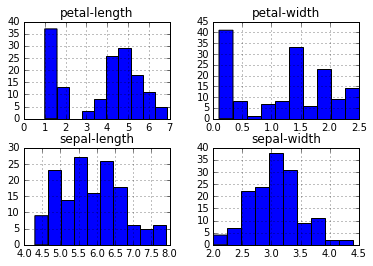

In [10]:
# histograms
df.hist()
plt.show()

### 3.2 Multivariate Plots

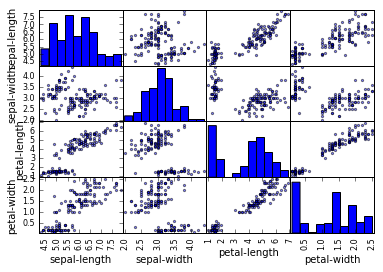

In [11]:
# scatter plot matrix
scatter_matrix(df)
plt.show()

## 4. Evaluate Some Algorithms

### 4.1 Creat a Validation Dataset

In [12]:
# split-out validation dataset
array= df.values
# L=array[:,0:4]
# M=df.ix[:,0:4]
# print(type(L),type(M))
X=array[:,0:4]
Y=array[:,4]
validation_size=0.20
seed=7
X_train,X_validation, Y_train, Y_validation=model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed)


### 4.2 Test Harness

In [13]:
# Test options and evaluation metric
seed=7
scoring='accuracy'

### 4.3 Build Models

In [14]:
# Spot Check Algorithms
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))
# evaluate each model in turn
results=[]
names=[]
for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s:%f(%f)"%(name, cv_results.mean(), cv_results.std())
    print(msg)
print(list(x for x, y in models))
print(names)

LR:0.966667(0.040825)
LDA:0.975000(0.038188)
KNN:0.983333(0.033333)
CART:0.975000(0.038188)
NB:0.975000(0.053359)
SVM:0.991667(0.025000)
['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']
['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM']


### 4.4 Select Best Model

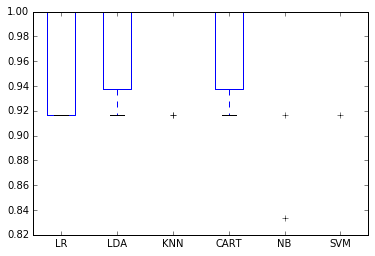

In [15]:
# Compare Algorithms
fig1,ax1= plt.subplots()
fig1.suptitle('Algoithm Comparison')
fig1.add_subplot(111)
fig1, ax2 = plt.subplots()
ax2.boxplot(results)
ax2.set_xticklabels(names)
fig1

## 5. Make predictions

In [16]:
# Make predictions on validation dataset
knn=KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn. predict(X_validation)
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



## 6. SVM Example


In [17]:
from sklearn import svm, datasets

In [18]:
iris=datasets.load_iris()
    
X=iris.data[:,:2]
y=iris.target


In [19]:
c=1.0
svc=svm.SVC(kernel='linear',C=1).fit(X,y)

In [20]:
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
h=(x_max/x_min)/100
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max))


In [21]:
plt.subplot(1,1,1)
Z=svc.predict(np.c_[xx.ravel(),yy.ravel()])
Z=Z.reshape(xx.shape)
plt.contourf(xx,yy,Z,cmap=plt.cm.Paired, alpha=0.8)

In [22]:
import numpy as np
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)

X=np.array([[np.nan, 2], [6, np.nan], [7, 6]])
# why do  i have to fit first?????????????
# print(imp.fit(X))
imp.transform(X)


NotFittedError: This Imputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.